In [9]:
import numpy as np
import matplotlib.pyplot as plt
import gym

In [10]:
env = gym.make('Taxi-v3')

In [2]:
alpha = 0.4
gamma = 0.9
epsilon = 0.9
total_episodes = 2000


rewards_sarsa = []
rewards_q_learning = []
rewards_expected_sarsa = []

In [3]:
def epsilon_greedy_policy(Q, state, n_actions):
    
    if np.random.uniform(0,1) < epsilon:
        return np.random.randint(n_actions)
    else:
        return np.argmax(Q[state])


def sarsa(Q,episodes):
    
    for episode in range(episodes):
        state = env.reset()
        action = epsilon_greedy_policy(Q, state, env.action_space.n)
        total_rewards = 0
        done = False

        while not done:
            next_state, reward, done, info = env.step(action)
            next_action = epsilon_greedy_policy(Q, next_state, env.action_space.n)

            
            Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])

            state, action = next_state, next_action
            total_rewards += reward

            
        rewards_sarsa.append(total_rewards)

    return Q


def q_learning(Q,episodes):
    
    for episode in range(episodes):
        state = env.reset()
        total_rewards = 0
        done = False

        while not done:
            action = epsilon_greedy_policy(Q, state, env.action_space.n)
            next_state, reward, done, _ = env.step(action)

            
            Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])

            state = next_state
            total_rewards += reward

            
        rewards_q_learning.append(total_rewards)

    return Q


def expected_sarsa(Q,episodes):
    
    for episode in range(episodes):
        state = env.reset()
        total_rewards = 0
        done = False
        while not done:
            action = epsilon_greedy_policy(Q, state, env.action_space.n)
            next_state, reward, done, _ = env.step(action)

            
            expected_q = np.dot(Q[next_state], epsilon / env.action_space.n + (1 - epsilon) * np.eye(env.action_space.n)[np.argmax(Q[next_state])])
            Q[state, action] += alpha * (reward + gamma * expected_q - Q[state, action])

            state = next_state
            total_rewards += reward

            

        rewards_expected_sarsa.append(total_rewards)

    return Q

In [4]:

Q_sarsa = np.zeros([env.observation_space.n, env.action_space.n])
Q_q_learning = np.zeros([env.observation_space.n, env.action_space.n])
Q_expected_sarsa = np.zeros([env.observation_space.n, env.action_space.n])

In [5]:

Q_sarsa = sarsa(Q_sarsa,total_episodes)
Q_q_learning = q_learning(Q_q_learning,total_episodes)
Q_expected_sarsa = expected_sarsa(Q_expected_sarsa,total_episodes)

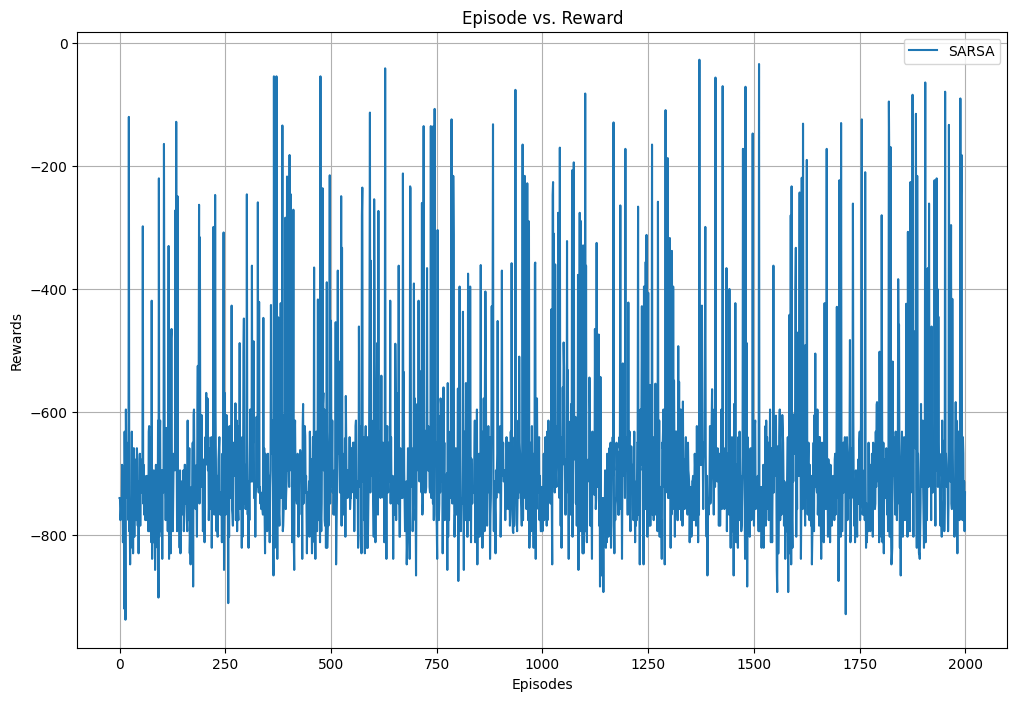

In [6]:
# Plotting
plt.figure(figsize=(12, 8))
plt.plot(rewards_sarsa, label='SARSA')
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title('Episode vs. Reward')
plt.legend()
plt.grid(True)
plt.show()

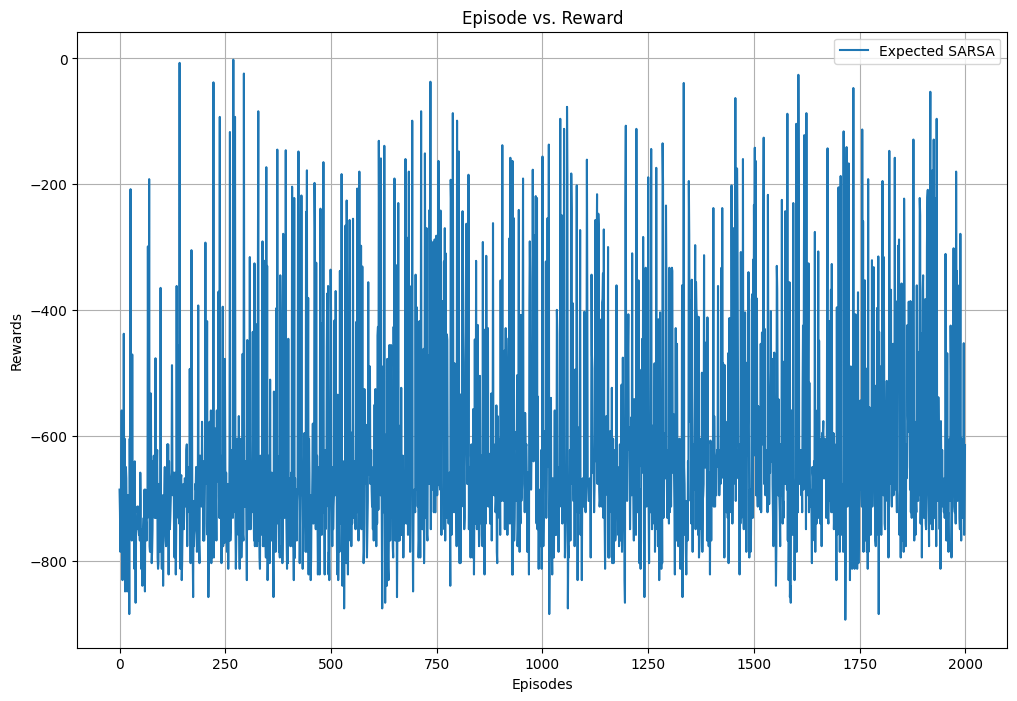

In [7]:
plt.figure(figsize=(12, 8))
plt.plot(rewards_expected_sarsa, label='Expected SARSA')
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title('Episode vs. Reward')
plt.legend()
plt.grid(True)
plt.show()


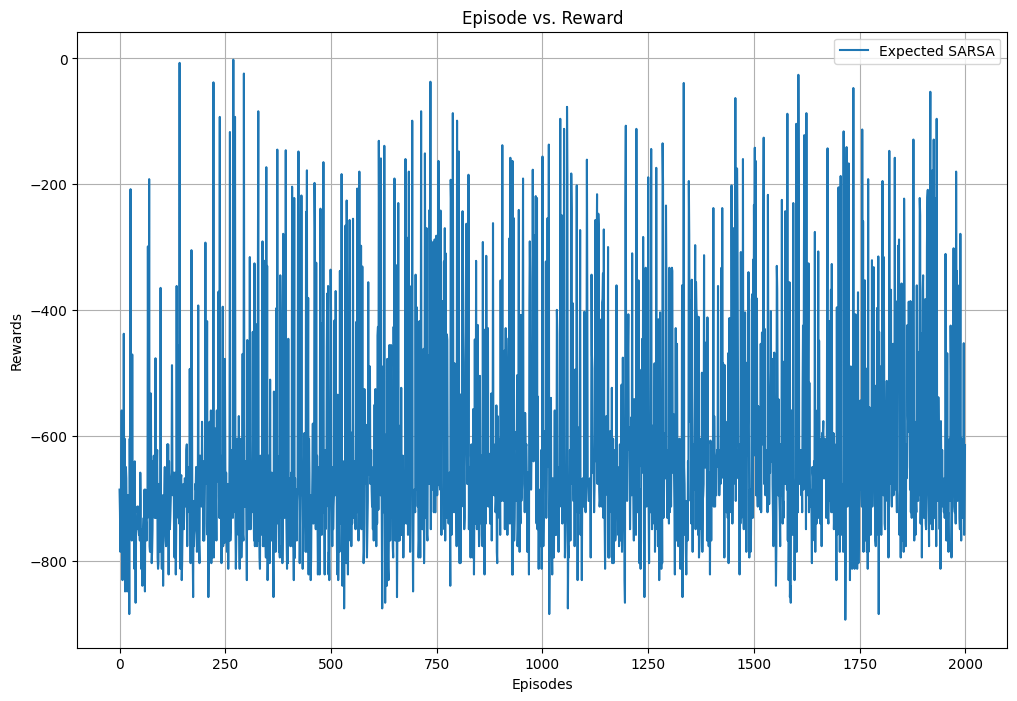

In [8]:
plt.figure(figsize=(12, 8))
plt.plot(rewards_expected_sarsa, label='Expected SARSA')
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title('Episode vs. Reward')
plt.legend()
plt.grid(True)
plt.show()

